**Texto de Isaac:** Excelente Trabajo.

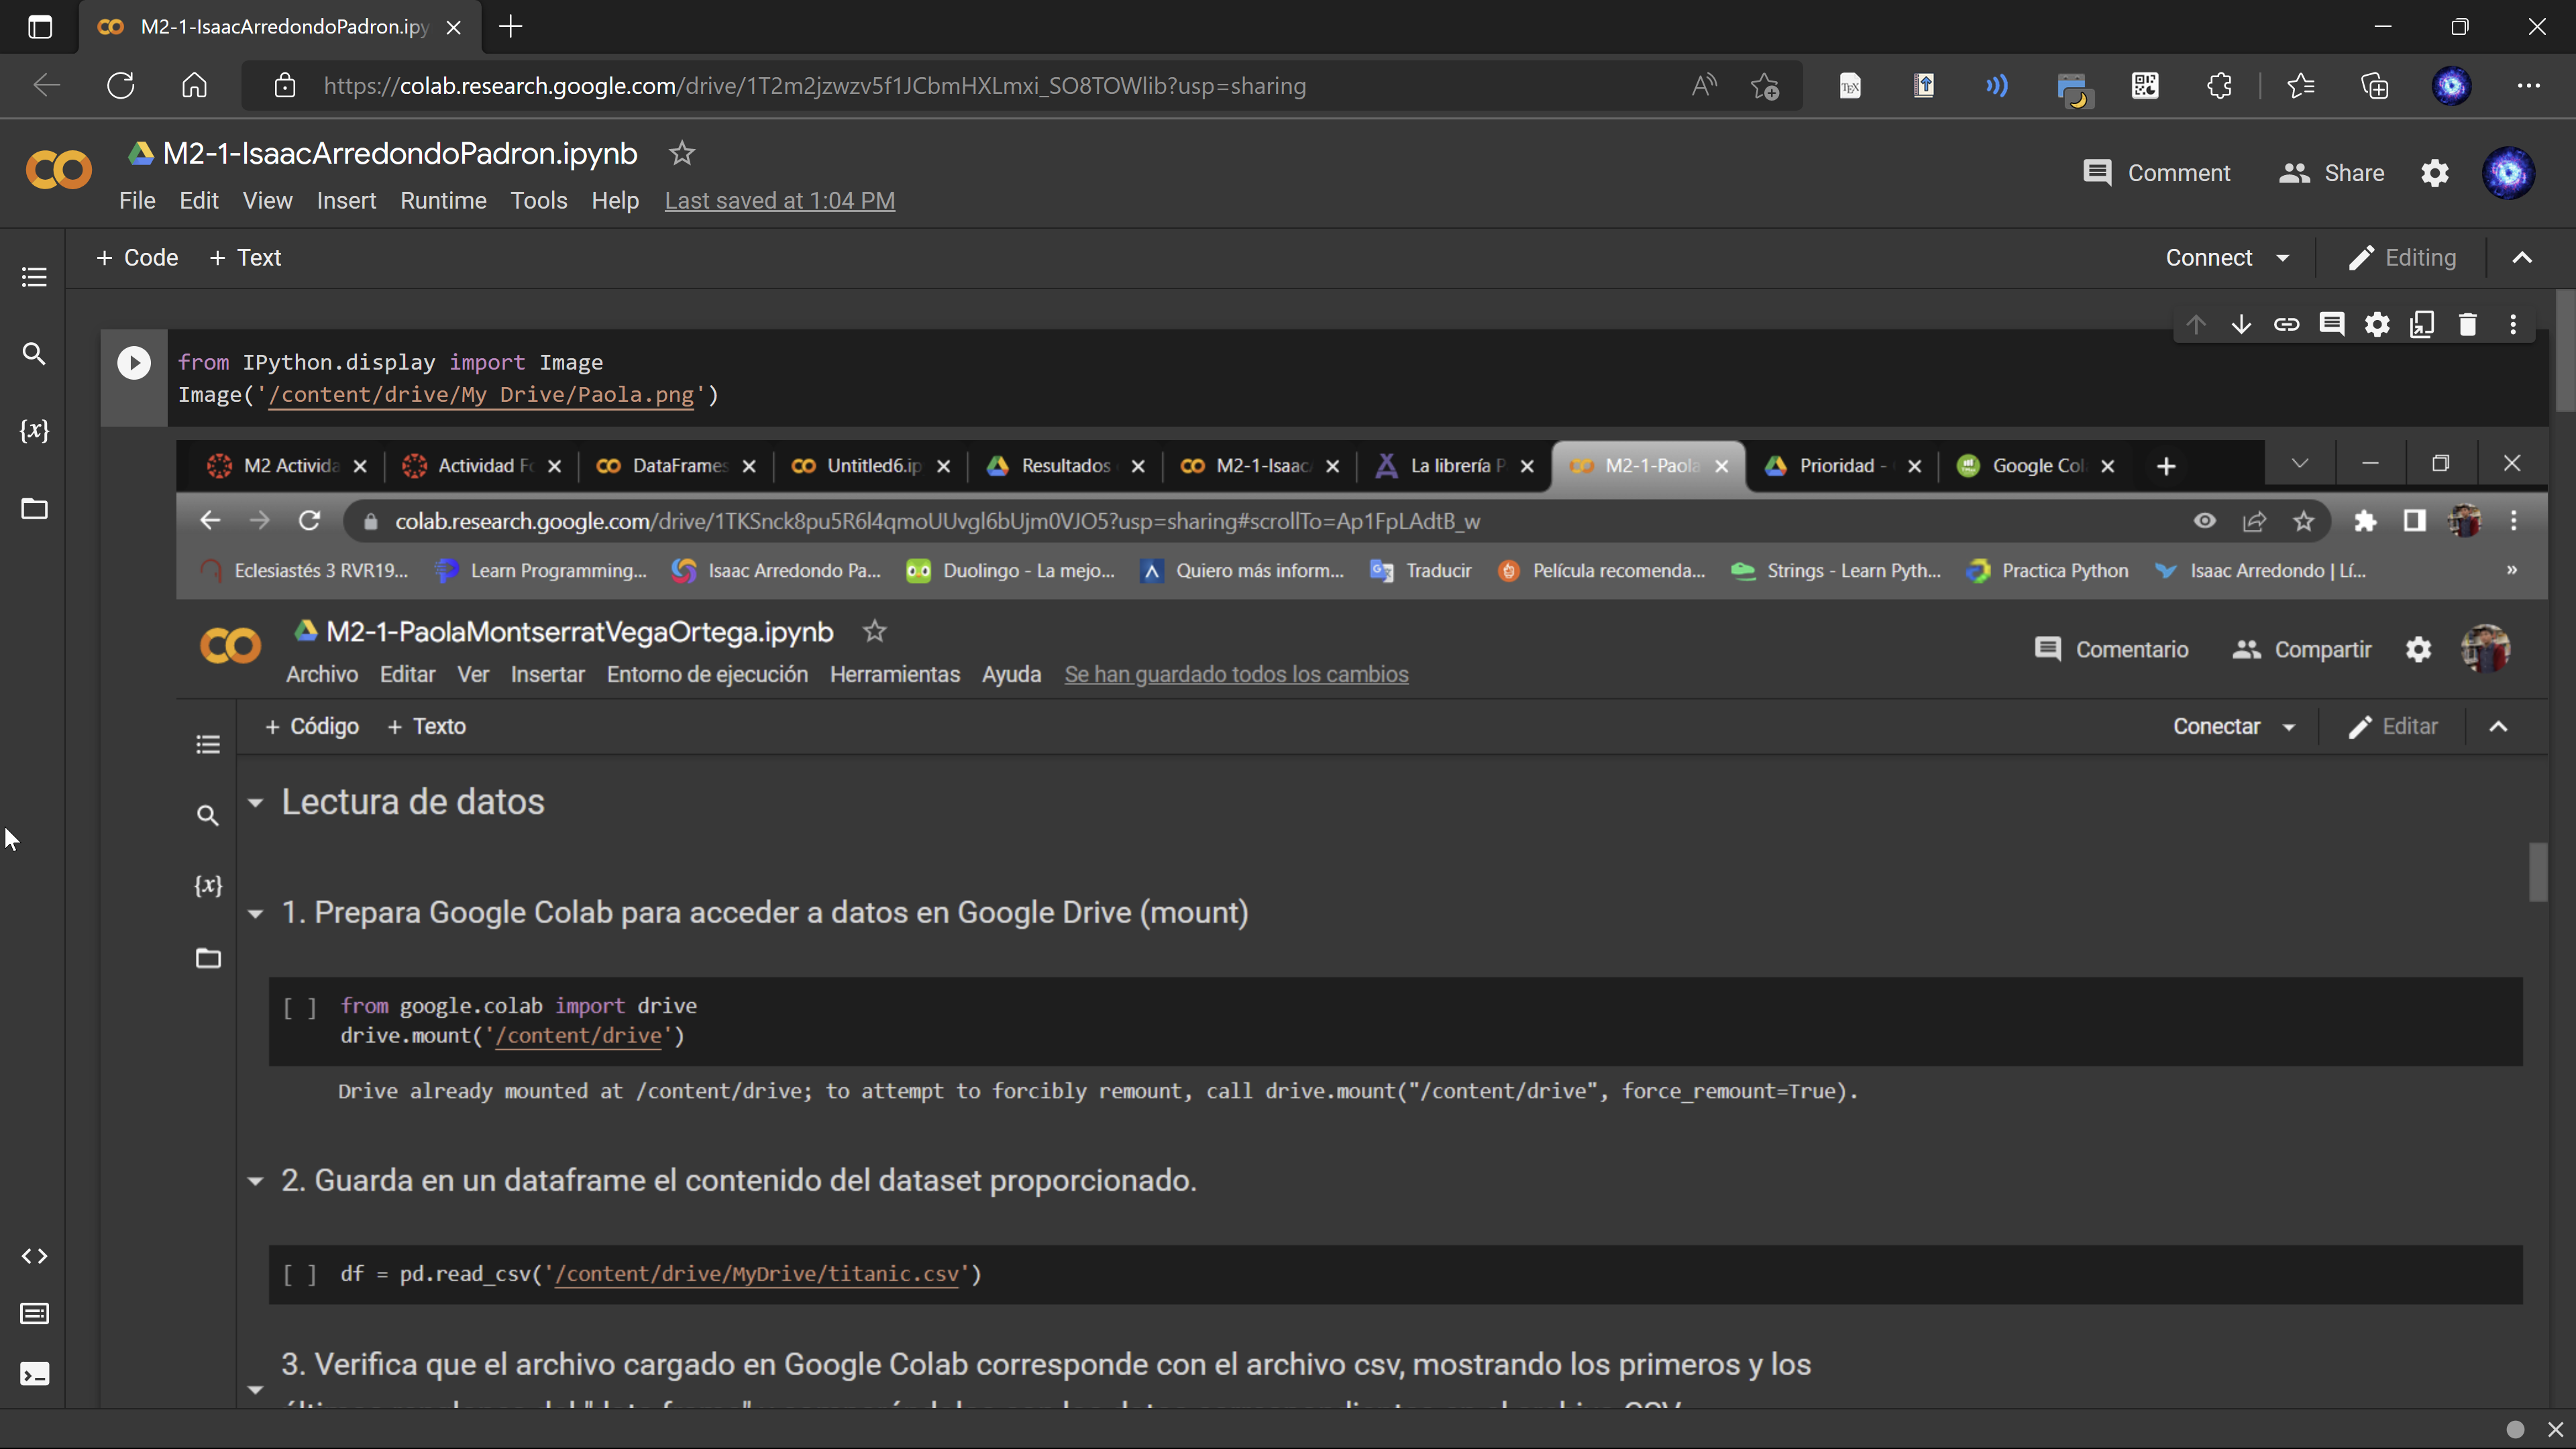

In [3]:
from IPython.display import Image
Image('foto_isaac.png')

# Actividad M2.1 Uso de Google Colab

Jaime Guzman Parada
A00827834

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lectura de datos

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descripcion de variables

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
Categoricas = ['Embarked', 'Sex', 'Pclass', 'Survived', 'SibSp','Parch']

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].describe())
  print('--------------------------')

PassengerId
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
--------------------------
Survived
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
--------------------------
Pclass
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
--------------------------
Name
count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object
--------------------------
Sex
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
--------------------------
Age
cou

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* La funcion **columns** nos regresa las columnas que tiene la "data frame".
* La funcion **describe** describe en varios aspectos estadisticos la "data frame" o, puede describir tambien una columna en especifico.
* La funcion **info** solo puede usarse con la "data frame", no con las columnas individuales, y esta describe los tipos de datos de cada columna, su cuenta de nulos en la columna y su nombre de columna.



In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Con las ultimas dos celas corridas nosotros podemos observar que tenemos 891 datos en cada una de nuestas 12 columnas, lo cual nos termina dando 10692 datos. De estos, 866 son nulos.

**¿Qué columnas aparecen en el resultado de describe?**

1.   Todas las columnas se muestran cuando se hace en la data frame y no en una columna especifica.

**Cuál es la tarifa más cara?** 
1.   512
**¿Cuál es el promedio de edad?**
1. 29.69

In [ ]:
cou = 0
for i in Categoricas:
  uni = df[i].unique()
  cou += len(uni)
print(cou)

25


## Analisis de Datos

In [ ]:
df['Fare'].sum()

28693.9493

In [ ]:
survivers = df[df['Survived'] == 1]
survivers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
dead = df[df['Survived'] == 0]
dead.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
